In [1]:
import sys
sys.path.append('/usr/local/lib/python3.9/site-packages')

In [2]:
import dionysus as d
import numpy as np
import pandas as pd
import scipy.io
import networkx as nx
import itertools
from itertools import chain
from itertools import compress
import matplotlib.pyplot as plt
import os
import math 
from numpy import linalg as LA
from networkx.generators.random_graphs import erdos_renyi_graph

In [3]:
from FunctionsMasterarbeit import *

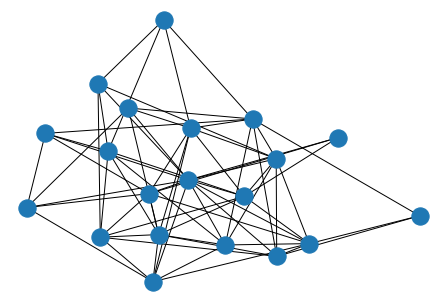

In [4]:
# create a weighted Erdös-Rényi Graph with adjacency matrix "randomma"
n =20
p = 0.35
g = erdos_renyi_graph(n, p)
adj=nx.adjacency_matrix(g)
adj=adj.todense()
randomma=np.multiply(adj,symmetricrandommatrix(n,0.01,1))
nx.draw(g)  # networkx draw()
plt.draw() 

In [5]:
#get the barcodes of the inverse Vietoris Rips filtration

In [6]:
dgms=getbackinverseVietorisrips(randomma, add_vertex_first = True)

In [7]:
dgms_tradu=traductionintervals (dgms,2)

In [8]:
#Be careful the plot is mirrored 

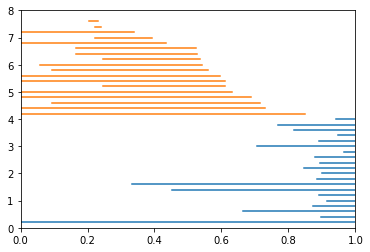

In [9]:
plotBarcodes(dgms_tradu)

In [10]:
#define in how many bins you want to discretize [0,1]
# and maximum order of the k-clique connectivity graph
nbins=15
maxdim=8

In [11]:
#get the plot matrices of the k-cliques communities of the graphs 
thekcliquecommunityplot=getplots(randomma,maxdim,nbins,pthhomo=1,Commonface=False,kplex=False,kclub=False,k=0)


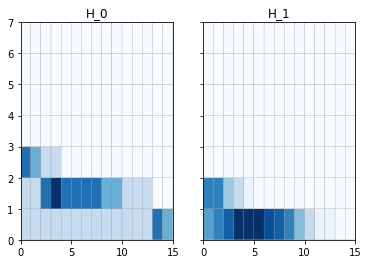

In [12]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
c = ax0.pcolor(thekcliquecommunityplot[0], edgecolors='grey', linewidths=0.2,cmap=plt.cm.Blues)
ax0.set_title('H_0')
c = ax1.pcolor(thekcliquecommunityplot[1], edgecolors='grey', linewidths=0.2,cmap=plt.cm.Blues)
ax1.set_title('H_1')
#plt.colorbar() 
plt.show()

In [13]:
#create 5 Barabasi-Albert random graphs and get the plot matrices of the k-cliques communities

In [14]:
list_adjmatrix=[]
plotscommuconneca=[]
for ii in range(0, 5):
    seeds=centralma(11)
    adj=BarabasiAlbert(20,2,seeds)
    np.fill_diagonal(adj, 0)
    list_adjmatrix.append(adj)
    plotscommuconneca.append(getplots(adj,maxdim,nbins,Commonface=False,kplex=False,kclub=False,k=0))

In [15]:
#compute the distance matrices 

In [16]:
distmatrices=[]
dim0=[]
for i in range(0,len(plotscommuconneca)):
    dim0.append(plotscommuconneca[i][0])
dim1=[]
for i in range(0,len(plotscommuconneca)):
    dim1.append(plotscommuconneca[i][1])
distmatrices.append(LtwodistanceMA(dim0))
distmatrices.append(LtwodistanceMA(dim1))

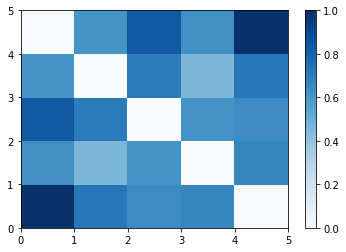

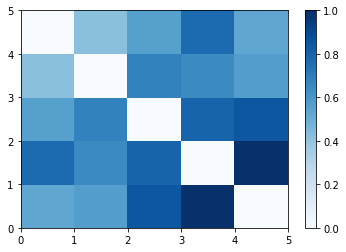

In [17]:
for i in range(0,len(distmatrices)):
    plt.figure(i)
    dist=distmatrices[i]
    dist=dist[:][range(len(dist)-1,-1,-1)]
    plt.pcolor(dist,cmap=plt.cm.Blues)
    plt.colorbar() 
    plt.show()

In [18]:
#get back the zigzag Barcodes with the clique-complex 
maxdim=7
dgms=getzigzag(list_adjmatrix,maxdim,kcliquecommu=False,common_face=False)

In [19]:
dgms_tradu=traductionintervals (dgms,2,zigzag=True)


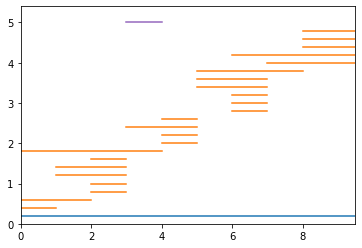

In [20]:
plotBarcodes(dgms_tradu,zigzag=True)

In [21]:
#get back the plot matrices of the zigzag k-clique community graphs

In [22]:
thekcliquecommunity_zigzag_plot=getzigzag(list_adjmatrix,maxdim,kcliquecommu=True,common_face=False)

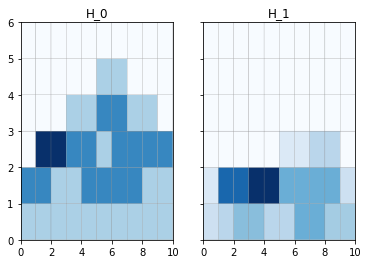

In [23]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
for i in range(0,len(thekcliquecommunity_zigzag_plot)):
    c = ax0.pcolor(thekcliquecommunity_zigzag_plot[0], edgecolors='grey', linewidths=0.2,cmap=plt.cm.Blues)
    ax0.set_title('H_0')
    c = ax1.pcolor(thekcliquecommunity_zigzag_plot[1], edgecolors='grey', linewidths=0.2,cmap=plt.cm.Blues)
    ax1.set_title('H_1')
    #plt.colorbar() 
    plt.show()